In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

from pysal.model import spreg
from pysal.lib import weights
from pysal.explore import esda

from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler

from pathlib import Path
data = Path('data/data_for_model')

In [2]:
import geopandas

In [3]:
df = gpd.read_feather(f'temp_rcp_landsat_morphology.feather')

In [5]:
community = gpd.read_file('data/temp/community_census_2019.geojson')
#df = gpd.read_file(f'temp_rcp_landsat_morphology.geojson')
#grids = gpd.read_feather(data/'grids.feather')

In [6]:
grids = gpd.read_feather(data/'grid.feather')

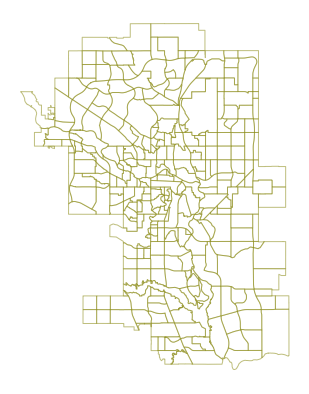

In [7]:
fig, ax = plt.subplots(1,1, figsize=(7, 7))
community.plot(ax=ax, color='white', edgecolor='olive', alpha=0.5)
ax.set_axis_off()

In [8]:
grids.head()

,id_x,title,idx,ward_num,name,geometry
0,"(47965, 87513, 18)","XYZ tile (47965, 87513, 18)",4.796588e+11,2,02L,"POLYGON ((281388.362 5678062.191, 281392.439 5..."
1,"(47966, 87513, 18)","XYZ tile (47966, 87513, 18)",4.796688e+11,2,02L,"POLYGON ((281484.255 5678058.105, 281488.329 5..."
2,"(47967, 87513, 18)","XYZ tile (47967, 87513, 18)",4.796788e+11,2,02L,"POLYGON ((281580.147 5678054.020, 281584.220 5..."
3,"(47968, 87513, 18)","XYZ tile (47968, 87513, 18)",4.796888e+11,2,02L,"POLYGON ((281676.040 5678049.937, 281680.111 5..."
4,"(47969, 87513, 18)","XYZ tile (47969, 87513, 18)",4.796988e+11,2,02L,"POLYGON ((281771.933 5678045.856, 281776.002 5..."


In [9]:
df.head()

,id_x,title,idx,ward_num,year,lst_mean_,lst_min_,lst_max_,ndvi_mean_,ndbi_max_,...,floor_number_mean,floor_number_median,floor_number_mode,SUBCLASS_mode,entropy,bbc,geometry,temp,rcp_2050,rcp_2080
0,"(47965, 87513, 18)","XYZ tile (47965, 87513, 18)",4.796588e+11,2,2013,-46.872059,-128.320053,-6.126640,-0.176223,0.248565,...,NaN,NaN,0.0,0,NaN,0.0,"POLYGON ((281388.362 5678062.191, 281392.439 5...",17.83,21.127,23.5489
1,"(47965, 87513, 18)","XYZ tile (47965, 87513, 18)",4.796588e+11,2,2014,-26.012579,-128.320053,25.302034,-0.038285,0.134085,...,NaN,NaN,0.0,0,NaN,0.0,"POLYGON ((281388.362 5678062.191, 281392.439 5...",16.87,20.167,22.5889
2,"(47965, 87513, 18)","XYZ tile (47965, 87513, 18)",4.796588e+11,2,2015,-23.700085,-128.320053,28.786824,-0.070602,0.090480,...,NaN,NaN,0.0,0,NaN,0.0,"POLYGON ((281388.362 5678062.191, 281392.439 5...",15.54,18.837,21.2589
3,"(47965, 87513, 18)","XYZ tile (47965, 87513, 18)",4.796588e+11,2,2016,-29.068090,-128.320053,20.670311,-0.037836,0.140104,...,NaN,NaN,0.0,0,NaN,0.0,"POLYGON ((281388.362 5678062.191, 281392.439 5...",11.29,14.587,17.0089
4,"(47965, 87513, 18)","XYZ tile (47965, 87513, 18)",4.796588e+11,2,2017,-25.107284,-128.320053,26.777225,-0.052160,0.106923,...,NaN,NaN,0.0,0,NaN,0.0,"POLYGON ((281388.362 5678062.191, 281392.439 5...",9.71,13.007,15.4289


In [10]:
df.columns

Index(['id_x', 'title', 'idx', 'ward_num', 'year', 'lst_mean_', 'lst_min_',
       'lst_max_', 'ndvi_mean_', 'ndbi_max_', 'ndbi_min_', 'lst_count_',
       'ndbi_count_', 'ndvi_count_', 'ndvi_min_', 'ndbi_mean_', 'ndvi_max_',
       'mndwi_min_', 'mndwi_max_', 'mndwi_mean_', 'albedo_min_', 'albedo_max_',
       'albedo_mean_', 'SHAPE_Area_sum', 'floor_area_sum', 'far_mean',
       'far_median', 'far_sum', 'bsc_mean', 'bsc_median', 'bsc_sum',
       'BUILDING_HEIGHT_MIN_mean', 'BUILDING_HEIGHT_MIN_median',
       'BUILDING_HEIGHT_MIN_sum', 'parcel_boundary_count', 'floor_number_sum',
       'floor_number_mean', 'floor_number_median', 'floor_number_mode',
       'SUBCLASS_mode', 'entropy', 'bbc', 'geometry', 'temp', 'rcp_2050',
       'rcp_2080'],
      dtype='object')

In [11]:
gdf = df.loc[:, ['idx', 'year', 'ndbi_mean_', 'ndvi_mean_', 'lst_mean_', 'SHAPE_Area_sum', 'floor_area_sum', 'mndwi_mean_', 'albedo_mean_',
                'far_mean', 'bsc_mean','bbc', 'parcel_boundary_count', 'BUILDING_HEIGHT_MIN_mean', 'floor_number_mode','temp', 'rcp_2050',
                'rcp_2080', 'entropy','ward_num','geometry']]

gdf = gdf.rename(columns={
    'ndbi_mean_': 'ndvi', 
    'ndvi_mean_': 'ndbi', 
    'lst_mean_': 'lst', 
    'mndwi_mean_': 'mndwi',
    'albedo_mean_':'albedo',
    'SHAPE_Area_sum': 'build_area', 
    'floor_area_sum': 'floor_area',
    'far_mean': 'far', 
    'bsc_mean': 'bsc', 
    'parcel_boundary_count': 'build_count', 
    'BUILDING_HEIGHT_MIN_mean': 'build_height', 
    'floor_number_mode': 'num_of_floors'
})

gdf = gdf.query('lst >= 0')
gdf['ward_num']=gdf['ward_num'].astype(int)

In [12]:
#use this file for trend plot- Soumya
gdf.to_feather('cleaned_2013_2020.feather')

C:\Users\Gramener\.conda\envs\eg_py37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: this is an initial implementation of Parquet/Feather file support and associated metadata.  This is tracking version 0.1.0 of the metadata specification at https://github.com/geopandas/geo-arrow-spec

This metadata specification does not yet make stability promises.  We do not yet recommend using this in a production setting unless you are able to rewrite your Parquet/Feather files.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')
  


In [13]:
gdf.head()

,idx,year,ndvi,ndbi,lst,build_area,floor_area,mndwi,albedo,far,...,bbc,build_count,build_height,num_of_floors,temp,rcp_2050,rcp_2080,entropy,ward_num,geometry
9,4.796688e+11,2014,0.065099,0.384158,25.350927,0.0,0.0,-0.033725,0.163378,NaN,...,0.0,0,NaN,0.0,16.87,20.167,22.5889,NaN,2,"POLYGON ((281484.255 5678058.105, 281488.329 5..."
10,4.796688e+11,2015,0.007687,0.314146,28.603772,0.0,0.0,-0.033725,0.163378,NaN,...,0.0,0,NaN,0.0,15.54,18.837,21.2589,NaN,2,"POLYGON ((281484.255 5678058.105, 281488.329 5..."
11,4.796688e+11,2016,0.092322,0.376071,20.130487,0.0,0.0,-0.033725,0.163378,NaN,...,0.0,0,NaN,0.0,11.29,14.587,17.0089,NaN,2,"POLYGON ((281484.255 5678058.105, 281488.329 5..."
12,4.796688e+11,2017,0.081003,0.383844,25.554827,0.0,0.0,-0.033725,0.163378,NaN,...,0.0,0,NaN,0.0,9.71,13.007,15.4289,NaN,2,"POLYGON ((281484.255 5678058.105, 281488.329 5..."
13,4.796688e+11,2018,0.109744,0.302253,21.937271,0.0,0.0,-0.033725,0.163378,NaN,...,0.0,0,NaN,0.0,14.51,17.807,20.2289,NaN,2,"POLYGON ((281484.255 5678058.105, 281488.329 5..."


In [14]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 642201 entries, 9 to 740727
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   idx            642201 non-null  float64 
 1   year           642201 non-null  int64   
 2   ndvi           642201 non-null  float64 
 3   ndbi           642201 non-null  float64 
 4   lst            642201 non-null  float64 
 5   build_area     642201 non-null  float64 
 6   floor_area     642201 non-null  float64 
 7   mndwi          642201 non-null  float64 
 8   albedo         642201 non-null  float64 
 9   far            262103 non-null  float64 
 10  bsc            262103 non-null  float64 
 11  bbc            642201 non-null  float64 
 12  build_count    642201 non-null  int64   
 13  build_height   262103 non-null  float64 
 14  num_of_floors  642201 non-null  float64 
 15  temp           642201 non-null  float64 
 16  rcp_2050       642201 non-null  float64 
 17  rc

## Applying Spatial Regression and Ordinary Least Squares Methods 
For understanding the Spatial Regression and Fixed Effects please refer to the detailed document [here](https://geographicdata.science/book/notebooks/11_regression.html)

In [15]:
results = {}
r2 = {}
models={}
features = [
    'ndvi',
    'ndbi',
    'build_area',
    'floor_area',
    'far',
    'bsc',
    'mndwi',
    'albedo',
    'build_count',
    'build_height',
    'num_of_floors',
    'entropy',
    'bbc'
]
   
def compute_knn(df, k=8):
    knn = weights.KNN.from_dataframe(df, k=k)
    wx = df[features].apply(
        lambda y: weights.spatial_lag.lag_spatial(knn, y)
    ).rename(columns=lambda c: 'w_' + c)
    
    return wx

    
def OLS(df_year):
    formula = f"lst ~ {' + '.join(features)}" 
    m1 = smf.ols(formula, data=df_year).fit()
    
    return m1


def OLS_spatial(df_year):
    X = df_year.join(compute_knn(df_year))
    
    features_sd = features + [f"w_{f}" for f in features]
    formula = f"lst ~ {' + '.join(features_sd)}" 
    m2 = smf.ols(formula, data=X).fit()

    return m2


def OLS_spatial_FE(df_year):
    
    formula = f"lst ~ {' + '.join(features)} + name - 1" 
    m3 = smf.ols(formula, data=df_year).fit()

    return m3


# def scale(df_year, fn=Normalizer):
#     scaler = fn()
#     df_year.loc[:, ['build_area', 'floor_area', 'far', 'bsc', 'build_count', 'build_height', 'num_of_floors']] = scaler.fit_transform(df_year[['build_area', 'floor_area', 'far', 'bsc', 'build_count', 'build_height', 'num_of_floors']])

#     return df_year


def process(df, year):
    #pdb.set_trace()
    df_year = (df.query('year == @year')
                 .replace(to_replace=np.nan, value=0))
    df_year = pd.merge(df_year, grids[['idx', 'name']], on='idx')
    #df_year = scale(df_year)
    
    m1 = OLS(df_year)
    m2 = OLS_spatial(df_year)
    m3 = OLS_spatial_FE(df_year)
    
    models[year] = [m1, m2, m3]
    results[year] = m3.params.values.tolist()
    r2[year] = [m1.rsquared, m2.rsquared, m3.rsquared]
    
    print(year, m1.rsquared, m2.rsquared, m3.rsquared)

In [16]:
#import pdb

In [17]:
for i in range(2013, 2021):
    process(gdf, i)

C:\Users\Gramener\.conda\envs\eg_py37\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 11 disconnected components.
  warnings.warn(message)


2013 0.18975776041599657 0.2542655098754163 0.5136811448306944
2014 0.5754836780357862 0.6806505497084578 0.7504478599690984
2015 0.44930127004077336 0.5406483589558587 0.6786586466395503
2016 0.25994629381419354 0.3175217166733614 0.7014146257710987
2017 0.6770572896208683 0.7645456481840819 0.7813674936288727
2018 0.3931250610540439 0.486733060822337 0.6067895010068842
2019 0.40637156416815534 0.5094164856085768 0.607724069172132
2020 0.5817000928215263 0.6972718635388181 0.8392851665939465


In [18]:
# for i in range(2019, 2021):
#     process(gdf, i)

### Visualize the coefficients

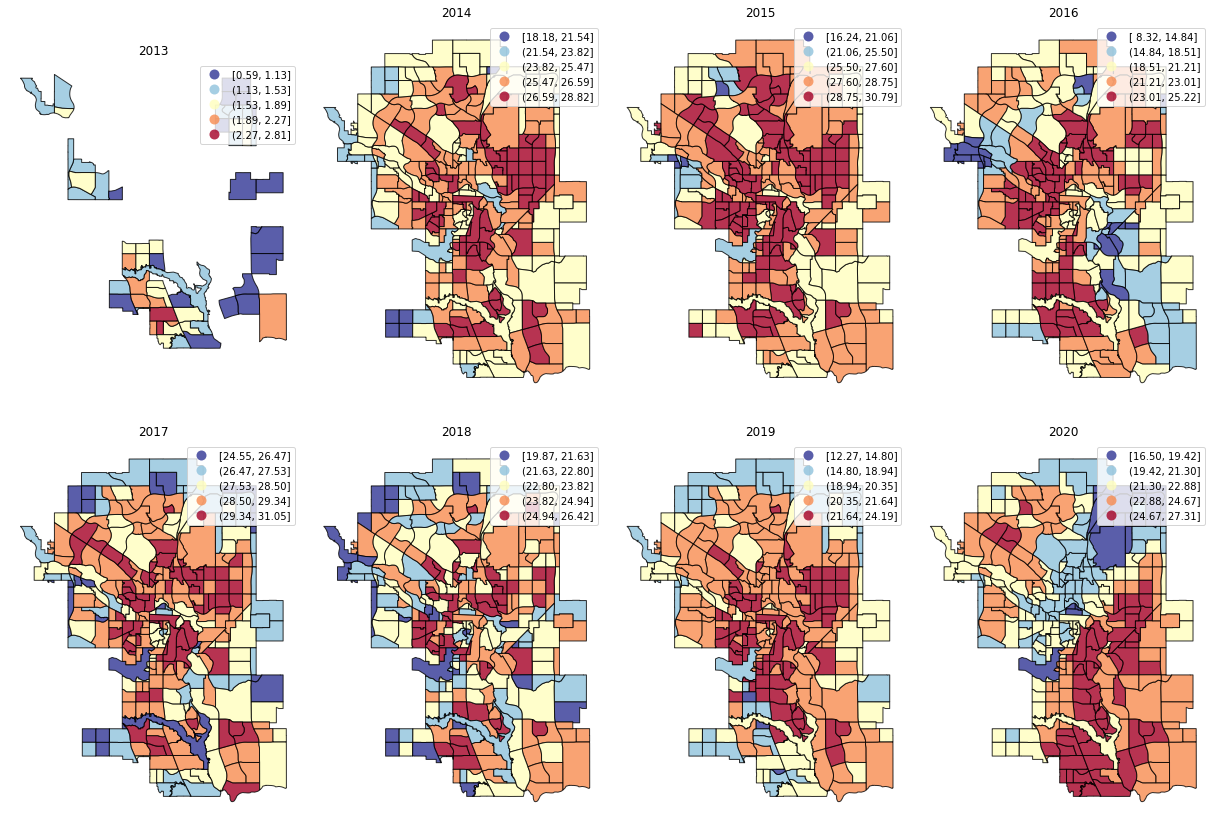

In [21]:
import re
import contextily as cx

pat = re.compile(r'name\[(.+)\]')

fig, axes = plt.subplots(2,4,figsize=(17, 12))

for year, axis in zip(range(2013, 2021), axes.flatten()):
    coef = models[year][2].params.to_dict()
    community_map = {re.match(pat, k).group(1):v for k,v in coef.items() if re.match(pat, k)}
    metrics = {k: v for k, v in coef.items() if not k.startswith('name')}
    
    community[f'lst_{year}'] = community['name'].map(community_map)
   # community.plot(ax=axis, column=f'lst_{year}', cmap='RdYlBu_r', edgecolor='k', alpha=0.8, legend=True, scheme='user_defined', classification_kwds={'bins':[9, 16, 19, 21, 24, 30]})
    community.plot(ax=axis, column=f'lst_{year}', cmap='RdYlBu_r', edgecolor='k', alpha=0.8, legend=True, scheme='FisherJenks')
    axis.set_title(year)
    axis.set_axis_off()
    
plt.tight_layout()

In [22]:
community[['name', 'lst_2013', 'lst_2014', 'lst_2015', 'lst_2016', 'lst_2017', 'lst_2018', 'lst_2019','lst_2020']].head(50).style.background_gradient(axis=1, cmap='bwr_r')

,name,lst_2013,lst_2014,lst_2015,lst_2016,lst_2017,lst_2018,lst_2019,lst_2020
0,LEGACY,1.029851,24.599171,26.400741,21.578263,27.289444,23.358451,19.960025,25.241593
1,HIGHLAND PARK,nan,23.555978,28.513425,22.087432,29.208320,22.111434,21.073060,19.984776
2,CORNERSTONE,nan,24.914823,27.426466,19.561797,26.790847,22.890194,18.291754,18.228209
3,MONTGOMERY,nan,25.912606,28.697321,23.587811,28.997776,24.566442,21.197218,22.852198
4,TEMPLE,1.680309,27.537587,29.278036,19.525166,28.926996,25.017640,21.824899,23.295085
5,01F,nan,25.254731,28.800795,21.526909,29.220631,24.282150,20.715427,24.449292
6,WOODBINE,1.967844,25.914130,28.243842,23.616457,28.942014,23.678688,21.190433,22.591116
7,UNIVERSITY HEIGHTS,nan,26.612955,29.212855,24.296224,29.575418,25.425926,21.887311,22.210659
8,BANKVIEW,nan,26.328703,29.105343,23.308729,29.174533,25.697788,21.445139,21.404613
9,ALBERT PARK/RADISSON HEIGHTS,nan,26.366023,28.728030,20.804087,29.126102,24.214041,21.858890,25.278653


In [23]:

community

,other_res,comm_structure,dup_occpd,mfh_owned,res_comm,name,twn_no_res,hotel_cnt,mul_no_res,apt_uc,...,prsch_chld,geometry,lst_2013,lst_2014,lst_2015,lst_2016,lst_2017,lst_2018,lst_2019,lst_2020
0,0.0,BUILDING OUT,343.0,0.0,0.0,LEGACY,2.0,0.0,0.0,2.0,...,850.0,"MULTIPOLYGON (((-114.02200 50.86308, -114.0213...",1.029851,24.599171,26.400741,21.578263,27.289444,23.358451,19.960025,25.241593
1,1.0,1950s,354.0,0.0,2.0,HIGHLAND PARK,0.0,0.0,0.0,1.0,...,325.0,"MULTIPOLYGON (((-114.06916 51.09565, -114.0667...",NaN,23.555978,28.513425,22.087432,29.208320,22.111434,21.073060,19.984776
2,0.0,2000s,171.0,0.0,0.0,CORNERSTONE,0.0,0.0,0.0,219.0,...,199.0,"MULTIPOLYGON (((-113.91840 51.17607, -113.9166...",NaN,24.914823,27.426466,19.561797,26.790847,22.890194,18.291754,18.228209
3,1.0,1950s,497.0,0.0,5.0,MONTGOMERY,0.0,5.0,0.0,0.0,...,328.0,"MULTIPOLYGON (((-114.16458 51.08145, -114.1644...",NaN,25.912606,28.697321,23.587811,28.997776,24.566442,21.197218,22.852198
4,1.0,1960s/1970s,570.0,0.0,0.0,TEMPLE,1.0,0.0,0.0,0.0,...,908.0,"MULTIPOLYGON (((-113.93513 51.09608, -113.9351...",1.680309,27.537587,29.278036,19.525166,28.926996,25.017640,21.824899,23.295085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,2.0,EMPLOYMENT,0.0,0.0,0.0,FRANKLIN,0.0,1.0,0.0,0.0,...,0.0,"MULTIPOLYGON (((-113.98171 51.06697, -113.9817...",NaN,28.815672,30.786492,24.935553,31.053728,24.525990,23.712067,26.704779
302,0.0,EMPLOYMENT,0.0,0.0,0.0,STONEGATE LANDING,0.0,0.0,0.0,0.0,...,0.0,"MULTIPOLYGON (((-113.97309 51.17250, -113.9700...",NaN,24.931923,27.869368,22.528414,27.298778,23.050525,18.717355,17.283984
303,1.0,1950s,534.0,0.0,1.0,CAPITOL HILL,0.0,0.0,0.0,0.0,...,325.0,"MULTIPOLYGON (((-114.09502 51.07437, -114.0947...",NaN,25.939707,28.599358,24.096571,29.246040,22.868318,21.308272,20.160628
304,0.0,1980s/1990s,130.0,0.0,0.0,HIDDEN VALLEY,0.0,0.0,0.0,0.0,...,762.0,"MULTIPOLYGON (((-114.09474 51.15426, -114.0947...",NaN,26.382131,28.199688,19.333209,28.782316,24.097963,20.678694,23.636784


In [24]:
r2_df = pd.DataFrame(r2, index=['ols', 'ols_spatial', 'ols_spatial_fe'])

### Comparing R Squared Values for each year from 2013 to 2020

In [25]:
r2_df.style.background_gradient(cmap='bwr_r')

,2013,2014,2015,2016,2017,2018,2019,2020
ols,0.189758,0.575484,0.449301,0.259946,0.677057,0.393125,0.406372,0.581700
ols_spatial,0.254266,0.680651,0.540648,0.317522,0.764546,0.486733,0.509416,0.697272
ols_spatial_fe,0.513681,0.750448,0.678659,0.701415,0.781367,0.606790,0.607724,0.839285


In [26]:
#average accuracy from 2014 to 2020
(0.751136+0.679618+0.702007+0.781810+0.607018+0.607815+0.840953)/7

0.7100510000000001

In [27]:
# Taking the avergae of community constants 
community['comm_constant']=(community['lst_2014'] + community['lst_2015']+ community['lst_2016'] + community['lst_2017'] +
                            community['lst_2018'] + community['lst_2019'] + community['lst_2020'])/7

In [28]:
community.head(3)

,other_res,comm_structure,dup_occpd,mfh_owned,res_comm,name,twn_no_res,hotel_cnt,mul_no_res,apt_uc,...,geometry,lst_2013,lst_2014,lst_2015,lst_2016,lst_2017,lst_2018,lst_2019,lst_2020,comm_constant
0,0.0,BUILDING OUT,343.0,0.0,0.0,LEGACY,2.0,0.0,0.0,2.0,...,"MULTIPOLYGON (((-114.02200 50.86308, -114.0213...",1.029851,24.599171,26.400741,21.578263,27.289444,23.358451,19.960025,25.241593,24.061098
1,1.0,1950s,354.0,0.0,2.0,HIGHLAND PARK,0.0,0.0,0.0,1.0,...,"MULTIPOLYGON (((-114.06916 51.09565, -114.0667...",NaN,23.555978,28.513425,22.087432,29.208320,22.111434,21.073060,19.984776,23.790632
2,0.0,2000s,171.0,0.0,0.0,CORNERSTONE,0.0,0.0,0.0,219.0,...,"MULTIPOLYGON (((-113.91840 51.17607, -113.9166...",NaN,24.914823,27.426466,19.561797,26.790847,22.890194,18.291754,18.228209,22.586299


In [29]:
community.columns

Index(['other_res', 'comm_structure', 'dup_occpd', 'mfh_owned', 'res_comm',
       'name', 'twn_no_res', 'hotel_cnt', 'mul_no_res', 'apt_uc',
       ...
       'geometry', 'lst_2013', 'lst_2014', 'lst_2015', 'lst_2016', 'lst_2017',
       'lst_2018', 'lst_2019', 'lst_2020', 'comm_constant'],
      dtype='object', length=151)

In [30]:
results_df = pd.DataFrame({k:v for k,v in results.items() if len(v) == 319})

In [31]:
results_df.index = models[2020][2].params.index

In [32]:
results_df[306:]

,2014,2015,2016,2017,2018,2019,2020
ndvi,-1.344635e+01,-1.262970e+01,-8.108466e+00,-1.338366e+01,-1.474206e+01,-7.597837e+00,-1.180834e+01
ndbi,3.814184e+00,3.496164e+00,3.236855e+00,2.574079e+00,6.091880e+00,4.444363e+00,1.289394e+00
build_area,-8.175616e-09,-8.961931e-09,-6.589921e-09,-6.794502e-09,-9.341316e-09,-7.394435e-09,-1.087334e-08
floor_area,-2.190106e-05,-2.067799e-05,-2.913536e-05,-2.125841e-05,-2.761383e-05,-2.493103e-05,-3.204854e-05
far,-6.037480e-02,-5.520044e-02,-6.294286e-02,-5.395767e-02,-4.158125e-02,-6.427131e-02,-9.391235e-02
bsc,3.316603e-01,3.421091e-01,3.239067e-01,3.271495e-01,3.263437e-01,4.214520e-01,5.139210e-01
mndwi,4.936516e-01,4.698408e-01,1.889839e+00,4.981106e-01,2.134290e-01,6.149797e-01,2.407868e+01
albedo,1.000076e+00,1.133943e+00,1.288879e+00,9.366154e-01,5.790917e-01,3.398496e-01,-2.322602e+00
build_count,-4.272772e-01,-4.093936e-01,-4.257374e-01,-4.090259e-01,-3.963349e-01,-5.575512e-01,-5.312958e-01
build_height,3.905726e-02,3.280803e-02,5.162192e-02,3.366163e-02,4.045720e-02,6.265428e-02,4.870553e-02


In [33]:
print(models[2020][2].params.index[306:])

Index(['ndvi', 'ndbi', 'build_area', 'floor_area', 'far', 'bsc', 'mndwi',
       'albedo', 'build_count', 'build_height', 'num_of_floors', 'entropy',
       'bbc'],
      dtype='object')


In [34]:
#results_df=results_df.reset_index()

In [35]:
#results_df=results_df.rename(columns={'index': 'variable'})

In [36]:
#results_df[306:]

In [37]:
variable_constant_df=results_df[306:]

### Calculating the Average constant values for every variable

In [38]:
variable_constant_df['average_constant']= (variable_constant_df[2014] + variable_constant_df[2015]+variable_constant_df[2016]+variable_constant_df[2017]+
                                          variable_constant_df[2018]+variable_constant_df[2019]+variable_constant_df[2020])/7

C:\Users\Gramener\.conda\envs\eg_py37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
variable_constant_df

,2014,2015,2016,2017,2018,2019,2020,average_constant
ndvi,-1.344635e+01,-1.262970e+01,-8.108466e+00,-1.338366e+01,-1.474206e+01,-7.597837e+00,-1.180834e+01,-1.167377e+01
ndbi,3.814184e+00,3.496164e+00,3.236855e+00,2.574079e+00,6.091880e+00,4.444363e+00,1.289394e+00,3.563846e+00
build_area,-8.175616e-09,-8.961931e-09,-6.589921e-09,-6.794502e-09,-9.341316e-09,-7.394435e-09,-1.087334e-08,-8.304437e-09
floor_area,-2.190106e-05,-2.067799e-05,-2.913536e-05,-2.125841e-05,-2.761383e-05,-2.493103e-05,-3.204854e-05,-2.536660e-05
far,-6.037480e-02,-5.520044e-02,-6.294286e-02,-5.395767e-02,-4.158125e-02,-6.427131e-02,-9.391235e-02,-6.174867e-02
bsc,3.316603e-01,3.421091e-01,3.239067e-01,3.271495e-01,3.263437e-01,4.214520e-01,5.139210e-01,3.695060e-01
mndwi,4.936516e-01,4.698408e-01,1.889839e+00,4.981106e-01,2.134290e-01,6.149797e-01,2.407868e+01,4.036933e+00
albedo,1.000076e+00,1.133943e+00,1.288879e+00,9.366154e-01,5.790917e-01,3.398496e-01,-2.322602e+00,4.222645e-01
build_count,-4.272772e-01,-4.093936e-01,-4.257374e-01,-4.090259e-01,-3.963349e-01,-5.575512e-01,-5.312958e-01,-4.509451e-01
build_height,3.905726e-02,3.280803e-02,5.162192e-02,3.366163e-02,4.045720e-02,6.265428e-02,4.870553e-02,4.413798e-02


In [40]:
variable_constant_df=variable_constant_df.reset_index()
variable_constant_df=variable_constant_df.rename(columns={'index': 'variable'})
variable_constant_df

,variable,2014,2015,2016,2017,2018,2019,2020,average_constant
0,ndvi,-1.344635e+01,-1.262970e+01,-8.108466e+00,-1.338366e+01,-1.474206e+01,-7.597837e+00,-1.180834e+01,-1.167377e+01
1,ndbi,3.814184e+00,3.496164e+00,3.236855e+00,2.574079e+00,6.091880e+00,4.444363e+00,1.289394e+00,3.563846e+00
2,build_area,-8.175616e-09,-8.961931e-09,-6.589921e-09,-6.794502e-09,-9.341316e-09,-7.394435e-09,-1.087334e-08,-8.304437e-09
3,floor_area,-2.190106e-05,-2.067799e-05,-2.913536e-05,-2.125841e-05,-2.761383e-05,-2.493103e-05,-3.204854e-05,-2.536660e-05
4,far,-6.037480e-02,-5.520044e-02,-6.294286e-02,-5.395767e-02,-4.158125e-02,-6.427131e-02,-9.391235e-02,-6.174867e-02
5,bsc,3.316603e-01,3.421091e-01,3.239067e-01,3.271495e-01,3.263437e-01,4.214520e-01,5.139210e-01,3.695060e-01
6,mndwi,4.936516e-01,4.698408e-01,1.889839e+00,4.981106e-01,2.134290e-01,6.149797e-01,2.407868e+01,4.036933e+00
7,albedo,1.000076e+00,1.133943e+00,1.288879e+00,9.366154e-01,5.790917e-01,3.398496e-01,-2.322602e+00,4.222645e-01
8,build_count,-4.272772e-01,-4.093936e-01,-4.257374e-01,-4.090259e-01,-3.963349e-01,-5.575512e-01,-5.312958e-01,-4.509451e-01
9,build_height,3.905726e-02,3.280803e-02,5.162192e-02,3.366163e-02,4.045720e-02,6.265428e-02,4.870553e-02,4.413798e-02


In [41]:
variable_constant_df=variable_constant_df[['variable','average_constant']]

# Average variable constant

In [42]:
variable_constant_df.to_json('variable_constant.json')

In [43]:
results_df.tail(13)

,2014,2015,2016,2017,2018,2019,2020
ndvi,-1.344635e+01,-1.262970e+01,-8.108466e+00,-1.338366e+01,-1.474206e+01,-7.597837e+00,-1.180834e+01
ndbi,3.814184e+00,3.496164e+00,3.236855e+00,2.574079e+00,6.091880e+00,4.444363e+00,1.289394e+00
build_area,-8.175616e-09,-8.961931e-09,-6.589921e-09,-6.794502e-09,-9.341316e-09,-7.394435e-09,-1.087334e-08
floor_area,-2.190106e-05,-2.067799e-05,-2.913536e-05,-2.125841e-05,-2.761383e-05,-2.493103e-05,-3.204854e-05
far,-6.037480e-02,-5.520044e-02,-6.294286e-02,-5.395767e-02,-4.158125e-02,-6.427131e-02,-9.391235e-02
bsc,3.316603e-01,3.421091e-01,3.239067e-01,3.271495e-01,3.263437e-01,4.214520e-01,5.139210e-01
mndwi,4.936516e-01,4.698408e-01,1.889839e+00,4.981106e-01,2.134290e-01,6.149797e-01,2.407868e+01
albedo,1.000076e+00,1.133943e+00,1.288879e+00,9.366154e-01,5.790917e-01,3.398496e-01,-2.322602e+00
build_count,-4.272772e-01,-4.093936e-01,-4.257374e-01,-4.090259e-01,-3.963349e-01,-5.575512e-01,-5.312958e-01
build_height,3.905726e-02,3.280803e-02,5.162192e-02,3.366163e-02,4.045720e-02,6.265428e-02,4.870553e-02


## trial with formula

In [48]:
def formula_process(df, year):
    df_year = (df.query('year == @year'))
    df_year = pd.merge(df_year, grids[['idx', 'name', 'geometry']], on='idx')
    
    return df_year

In [49]:
gdf_cut= gdf[ [
    'idx',
    'ndvi',
    'ndbi',
    'mndwi',
    'albedo',
    'build_area',
    'floor_area',
    'far',
    'bsc',
    'build_count',
    'build_height',
    'num_of_floors',
    'bbc',
    'entropy',
    'year',
    'lst',
    'temp',
    'rcp_2050',
    'rcp_2080'
]]

In [50]:
gdf_all = (gdf.query('year > 2013')
                 .dropna())

### Robust Scaler
Scale features using statistics that are robust to outliers.

Standardization of a dataset is a common requirement for many machine learning estimators. Typically this is done by removing the mean and scaling to unit variance. However, outliers can often influence the sample mean / variance in a negative way. In such cases, the median and the interquartile range often give better results.

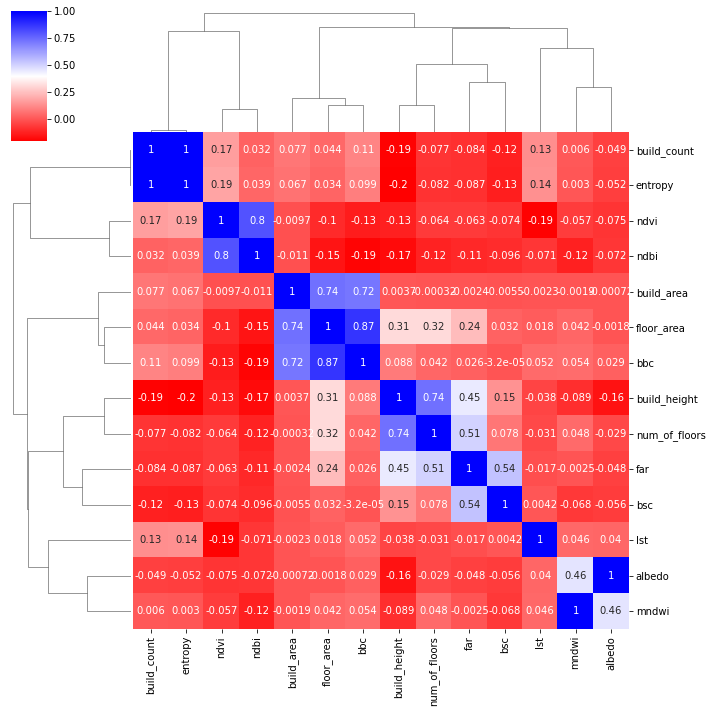

In [51]:
scaler = RobustScaler()
gdf_all= gdf_all[ [
    'ndvi',
    'ndbi',
    'build_area',
    'floor_area',
    'far',
    'bsc',
    'mndwi',
    'albedo',
    'build_count',
    'build_height',
    'num_of_floors',
    'entropy',
    'lst',
    'bbc'
]]

gdf_all=gdf_all.dropna()
gdf_all = pd.DataFrame(data=scaler.fit_transform(gdf_all),
                              columns=gdf_all.columns)


sns.clustermap(gdf_all.corr().sort_values(by='lst'), cmap='bwr_r', annot=True)

# Average correlation coefficients (2014-2020)

In [52]:
gdf_all_cor=gdf_all.corr()

In [53]:
#Saving Average correlation
gdf_all_cor.to_json('avg_corr_2014_2020.json')

In [54]:
#gdf_2020
gdf_2020=formula_process(gdf_cut, 2020)

In [55]:
gdf_2020.shape

(91094, 21)

In [56]:
gdf_2020.head(3)

,idx,ndvi,ndbi,mndwi,albedo,build_area,floor_area,far,bsc,build_count,...,num_of_floors,bbc,entropy,year,lst,temp,rcp_2050,rcp_2080,name,geometry
0,4.796688e+11,0.145174,0.457013,0.223008,0.520273,0.0,0.0,NaN,NaN,0,...,0.0,0.0,NaN,2020,21.718426,14.59,17.887,20.3089,02L,"POLYGON ((281484.255 5678058.105, 281488.329 5..."
1,4.796788e+11,0.119937,0.435247,0.225881,0.522559,0.0,0.0,NaN,NaN,0,...,0.0,0.0,NaN,2020,21.358757,14.59,17.887,20.3089,02L,"POLYGON ((281580.147 5678054.020, 281584.220 5..."
2,4.796888e+11,0.184333,0.477338,0.226290,0.532669,0.0,0.0,NaN,NaN,0,...,0.0,0.0,NaN,2020,20.995461,14.59,17.887,20.3089,02L,"POLYGON ((281676.040 5678049.937, 281680.111 5..."


In [57]:
gdf_2020.shape

(91094, 21)

In [58]:
gdf_2020.isna().sum()

idx                  0
ndvi                 0
ndbi                 0
mndwi                0
albedo               0
build_area           0
floor_area           0
far              53331
bsc              53331
build_count          0
build_height     53331
num_of_floors        0
bbc                  0
entropy          53331
year                 0
lst                  0
temp                 0
rcp_2050             0
rcp_2080             0
name                 0
geometry             0
dtype: int64

In [59]:
community.head()

,other_res,comm_structure,dup_occpd,mfh_owned,res_comm,name,twn_no_res,hotel_cnt,mul_no_res,apt_uc,...,geometry,lst_2013,lst_2014,lst_2015,lst_2016,lst_2017,lst_2018,lst_2019,lst_2020,comm_constant
0,0.0,BUILDING OUT,343.0,0.0,0.0,LEGACY,2.0,0.0,0.0,2.0,...,"MULTIPOLYGON (((-114.02200 50.86308, -114.0213...",1.029851,24.599171,26.400741,21.578263,27.289444,23.358451,19.960025,25.241593,24.061098
1,1.0,1950s,354.0,0.0,2.0,HIGHLAND PARK,0.0,0.0,0.0,1.0,...,"MULTIPOLYGON (((-114.06916 51.09565, -114.0667...",NaN,23.555978,28.513425,22.087432,29.208320,22.111434,21.073060,19.984776,23.790632
2,0.0,2000s,171.0,0.0,0.0,CORNERSTONE,0.0,0.0,0.0,219.0,...,"MULTIPOLYGON (((-113.91840 51.17607, -113.9166...",NaN,24.914823,27.426466,19.561797,26.790847,22.890194,18.291754,18.228209,22.586299
3,1.0,1950s,497.0,0.0,5.0,MONTGOMERY,0.0,5.0,0.0,0.0,...,"MULTIPOLYGON (((-114.16458 51.08145, -114.1644...",NaN,25.912606,28.697321,23.587811,28.997776,24.566442,21.197218,22.852198,25.115910
4,1.0,1960s/1970s,570.0,0.0,0.0,TEMPLE,1.0,0.0,0.0,0.0,...,"MULTIPOLYGON (((-113.93513 51.09608, -113.9351...",1.680309,27.537587,29.278036,19.525166,28.926996,25.017640,21.824899,23.295085,25.057915


In [60]:
#convert NaN to zero
gdf_2020['far'] = gdf_2020['far'].replace(np.nan, 0)
gdf_2020['bsc'] = gdf_2020['bsc'].replace(np.nan, 0)
gdf_2020['build_height'] = gdf_2020['build_height'].replace(np.nan, 0)
gdf_2020['entropy'] = gdf_2020['entropy'].replace(np.nan, 0)


In [61]:
# add predicted value
gdf_2020['pred_y']=models[2020][2].predict(gdf_2020)
gdf_2020['diff'] = gdf_2020['lst'] - gdf_2020['pred_y']

In [62]:
## Merged with community constant
df_year_2020 = pd.merge(gdf_2020, community[['name','comm_constant']], on='name')



In [63]:
gdf_2020=df_year_2020.rename(columns={"name": "community"})

In [64]:
gdf_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91094 entries, 0 to 91093
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   idx            91094 non-null  float64 
 1   ndvi           91094 non-null  float64 
 2   ndbi           91094 non-null  float64 
 3   mndwi          91094 non-null  float64 
 4   albedo         91094 non-null  float64 
 5   build_area     91094 non-null  float64 
 6   floor_area     91094 non-null  float64 
 7   far            91094 non-null  float64 
 8   bsc            91094 non-null  float64 
 9   build_count    91094 non-null  int64   
 10  build_height   91094 non-null  float64 
 11  num_of_floors  91094 non-null  float64 
 12  bbc            91094 non-null  float64 
 13  entropy        91094 non-null  float64 
 14  year           91094 non-null  int64   
 15  lst            91094 non-null  float64 
 16  temp           91094 non-null  float64 
 17  rcp_2050       91094 non-null  

In [65]:
gdf_2020['diff'].max()

11.60255399148572

In [66]:
gdf_2020[gdf_2020['diff']<1].count()

idx              72186
ndvi             72186
ndbi             72186
mndwi            72186
albedo           72186
build_area       72186
floor_area       72186
far              72186
bsc              72186
build_count      72186
build_height     72186
num_of_floors    72186
bbc              72186
entropy          72186
year             72186
lst              72186
temp             72186
rcp_2050         72186
rcp_2080         72186
community        72186
geometry         72186
pred_y           72186
diff             72186
comm_constant    72186
dtype: int64

In [67]:
gdf_2020['diff'].mean()

2.2293237719328072e-10

In [68]:
gdf_2020.head()

,idx,ndvi,ndbi,mndwi,albedo,build_area,floor_area,far,bsc,build_count,...,year,lst,temp,rcp_2050,rcp_2080,community,geometry,pred_y,diff,comm_constant
0,4.796688e+11,0.145174,0.457013,0.223008,0.520273,0.0,0.0,0.0,0.0,0,...,2020,21.718426,14.59,17.887,20.3089,02L,"POLYGON ((281484.255 5678058.105, 281488.329 5...",24.175426,-2.457000,23.076047
1,4.796788e+11,0.119937,0.435247,0.225881,0.522559,0.0,0.0,0.0,0.0,0,...,2020,21.358757,14.59,17.887,20.3089,02L,"POLYGON ((281580.147 5678054.020, 281584.220 5...",24.509227,-3.150470,23.076047
2,4.796888e+11,0.184333,0.477338,0.226290,0.532669,0.0,0.0,0.0,0.0,0,...,2020,20.995461,14.59,17.887,20.3089,02L,"POLYGON ((281676.040 5678049.937, 281680.111 5...",23.789457,-2.793996,23.076047
3,4.796688e+11,0.518398,0.782916,0.226778,0.526741,0.0,0.0,0.0,0.0,0,...,2020,20.766422,14.59,17.887,20.3089,02L,"POLYGON ((281480.180 5677962.464, 281484.255 5...",20.264244,0.502178,23.076047
4,4.796788e+11,0.509404,0.776483,0.225995,0.528407,0.0,0.0,0.0,0.0,0,...,2020,20.650126,14.59,17.887,20.3089,02L,"POLYGON ((281576.074 5677958.379, 281580.147 5...",20.339424,0.310702,23.076047


In [69]:
gdf_2020=gpd.GeoDataFrame(gdf_2020, geometry='geometry')
gdf_2020.to_file('calgary_2020.geojson', driver='GeoJSON')

# Take a community and perform

In [70]:
gdf_2020=gpd.read_file('calgary_2020.geojson')
gdf_2020.columns

Index(['idx', 'ndvi', 'ndbi', 'mndwi', 'albedo', 'build_area', 'floor_area',
       'far', 'bsc', 'build_count', 'build_height', 'num_of_floors', 'bbc',
       'entropy', 'year', 'lst', 'temp', 'rcp_2050', 'rcp_2080', 'community',
       'pred_y', 'diff', 'comm_constant', 'geometry'],
      dtype='object')

In [71]:
gdf_green_view= gdf_2020.loc[gdf_2020['community'] == 'GREENVIEW INDUSTRIAL PARK']

In [72]:
gdf_green_view.head(1)

,idx,ndvi,ndbi,mndwi,albedo,build_area,floor_area,far,bsc,build_count,...,year,lst,temp,rcp_2050,rcp_2080,community,pred_y,diff,comm_constant,geometry
31989,4.802088e+11,0.065866,0.222905,0.214782,0.51111,0.0,0.0,0.0,0.0,0,...,2020,24.977363,14.59,17.887,20.3089,GREENVIEW INDUSTRIAL PARK,23.954105,1.023258,25.211998,"POLYGON ((286125.209 5664912.347, 286129.190 5..."


In [73]:
gdf_green_view=gdf_green_view.reset_index(drop=True)

In [74]:
gdf_green_view.comm_constant.loc[0]

25.211997675810917

In [75]:
variable_constant_df=pd.read_json('variable_constant.json')

In [76]:
variable_constant_df

,variable,average_constant
0,ndvi,-1.167377e+01
1,ndbi,3.563846e+00
2,build_area,-8.300000e-09
3,floor_area,-2.536660e-05
4,far,-6.174867e-02
5,bsc,3.695060e-01
6,mndwi,4.036933e+00
7,albedo,4.222645e-01
8,build_count,-4.509451e-01
9,build_height,4.413798e-02


In [77]:
variable_constant_df.index = variable_constant_df.variable

In [78]:
variable_constant_df.columns

Index(['variable', 'average_constant'], dtype='object')

In [79]:
variable_constant_df

,variable,average_constant
variable,,
ndvi,ndvi,-1.167377e+01
ndbi,ndbi,3.563846e+00
build_area,build_area,-8.300000e-09
floor_area,floor_area,-2.536660e-05
far,far,-6.174867e-02
bsc,bsc,3.695060e-01
mndwi,mndwi,4.036933e+00
albedo,albedo,4.222645e-01
build_count,build_count,-4.509451e-01


In [80]:
variable_constant_df['average_constant']['ndvi']

-11.6737721654

In [81]:
gdf_green_view.comm_constant.loc[0]

25.211997675810917

In [82]:
gdf_green_view['pred_y']=gdf_green_view.comm_constant.loc[0] + ((variable_constant_df['average_constant']['ndvi']*gdf_green_view.ndvi) +
                                (variable_constant_df['average_constant']['ndbi']*gdf_green_view.ndbi) + 
                                (variable_constant_df['average_constant']['build_area']*gdf_green_view.build_area)+ 
                                (variable_constant_df['average_constant']['floor_area']*gdf_green_view.floor_area)+ 
                                (variable_constant_df['average_constant']['far']*gdf_green_view.far)+                                
                                (variable_constant_df['average_constant']['bsc']*gdf_green_view.bsc)+ 
                                (variable_constant_df['average_constant']['build_count']*gdf_green_view.build_count)+ 
                                (variable_constant_df['average_constant']['build_height']*gdf_green_view.build_height)+ 
                                (variable_constant_df['average_constant']['num_of_floors']*gdf_green_view.num_of_floors)+ 
                                (variable_constant_df['average_constant']['bbc']*gdf_green_view.bbc)+ 
                                (variable_constant_df['average_constant']['entropy']*gdf_green_view.entropy)+
                                (variable_constant_df['average_constant']['mndwi']*gdf_green_view.mndwi)+
                                (variable_constant_df['average_constant']['albedo']*gdf_green_view.albedo))